In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
from lmfit import models
from itertools import combinations
import numpy as np
from scipy.signal import find_peaks, peak_prominences


In [37]:
df_convert = pd.read_csv("Magnetic_field_data/ALL0000/F0000CH4.CSV", header=None, usecols=[3,4])

df01= pd.read_csv("Magnetic_field_data/ALL0001/F0001CH2.CSV", header=None, usecols=[3,4])
df02= pd.read_csv("Magnetic_field_data/ALL0001/F0001CH3.CSV", header=None, usecols=[3,4])

df11 = pd.read_csv("Magnetic_field_data/ALL0002/F0002CH3.CSV", header=None, usecols=[3,4])
df12 = pd.read_csv("Magnetic_field_data/ALL0002/F0002CH4.CSV", header=None, usecols=[3,4])

df21= pd.read_csv("Magnetic_field_data/ALL0003/F0003CH3.CSV", header=None, usecols=[3,4])
df22 = pd.read_csv("Magnetic_field_data/ALL0003/F0003CH4.CSV", header=None, usecols=[3,4])

dd31 = pd.read_csv("Magnetic_field_data/ALL0004/F0004CH3.CSV", header=None, usecols=[3,4])
df32 = pd.read_csv("Magnetic_field_data/ALL0004/F0004CH4.CSV", header=None, usecols=[3,4])

df41 = pd.read_csv("Magnetic_field_data/ALL0005/F0005CH3.CSV", header=None, usecols=[3,4])
df42 = pd.read_csv("Magnetic_field_data/ALL0005/F0005CH4.CSV", header=None, usecols=[3,4])

df01



,3,4
0,0.13380,0.0272
1,0.13381,0.0280
2,0.13382,0.0280
3,0.13383,0.0272
4,0.13384,0.0280
...,...,...
2495,0.15875,0.0312
2496,0.15876,0.0312
2497,0.15877,0.0312
2498,0.15878,0.0312


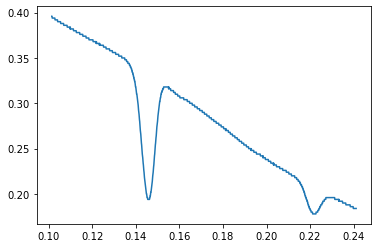

In [38]:
convertxcut = []
convertycut = []
df_convertx = df_convert[3]
df_converty = df_convert[4]

for x in range(800,2200):
    convertxcut.append(df_convertx[x])
    convertycut.append(df_converty[x])

plt.plot(convertxcut, convertycut)


In [39]:
#fit/find peak converting data
def LinFunc(x, a, b):
    y = a*x+b
    return y

Lin_model = models.Model(LinFunc)
gm1 = models.GaussianModel(prefix="A_")
gm2= models.GaussianModel(prefix="B_")

tot_model = Lin_model + gm1 + gm2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')

parameter names: ['a', 'b', 'A_amplitude', 'A_center', 'A_sigma', 'B_amplitude', 'B_center', 'B_sigma']
independent variables: ['x']


In [40]:
a = (convertycut[0]-convertycut[len(convertycut)-1])/(convertxcut[0]-convertxcut[len(convertxcut)-1])

b = 2.5

[[Model]]
    ((Model(LinFunc) + Model(gaussian, prefix='A_')) + Model(gaussian, prefix='B_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 155
    # data points      = 1400
    # variables        = 8
    chi-square         = 0.01133409
    reduced chi-square = 8.1423e-06
    Akaike info crit   = -16397.8347
    Bayesian info crit = -16355.8809
    R-squared          = 0.99817116
[[Variables]]
    a:           -1.58055088 +/- 0.00215987 (0.14%) (init = -1.515368)
    b:            0.55848117 +/- 3.7108e-04 (0.07%) (init = 2.5)
    A_amplitude: -9.6193e-04 +/- 3.7861e-06 (0.39%) (init = -0.25)
    A_center:     0.14555992 +/- 1.1780e-05 (0.01%) (init = 0.14)
    A_sigma:      0.00281151 +/- 1.2118e-05 (0.43%) (init = 1.8227e-05)
    B_amplitude: -2.3913e-04 +/- 4.4286e-06 (1.85%) (init = -0.1)
    B_center:     0.22129427 +/- 5.6256e-05 (0.03%) (init = 0.22)
    B_sigma:      0.00315179 +/- 6.0178e-05 (1.91%) (init = 1.8227e-05)
    A_fwhm:       0.006620

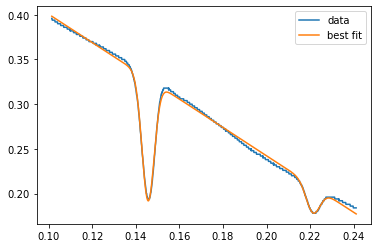

In [41]:
result = tot_model.fit(convertycut, x=convertxcut, a=a, b=b, A_amplitude=-0.25, A_center=0.14, A_sigma=1.8227e-05, B_amplitude=-0.1, B_center=0.22, B_sigma=1.8227e-05)



print(result.fit_report())

plt.plot(convertxcut, convertycut, label='data')
#plt.plot(df[9], result.init_fit, '--', label='initial fit')
plt.plot(convertxcut, result.best_fit, '-', label='best fit')
plt.legend()

converting x-axis to frequency

Text(0, 0.5, 'Intensity')

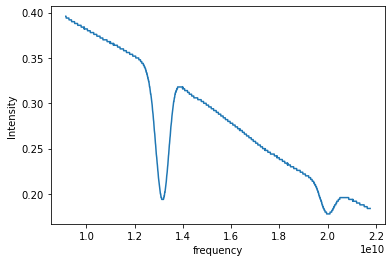

In [42]:

delta_t = result.params.get("B_center").value-result.params.get("A_center").value
delta_f = 6834.7e6

const = delta_f/delta_t
df_fre = []
for i in range(len(convertxcut)):
    df_fre.append(convertxcut[i] * const)

plt.plot(df_fre, convertycut)
plt.xlabel("frequency")
plt.ylabel("Intensity")

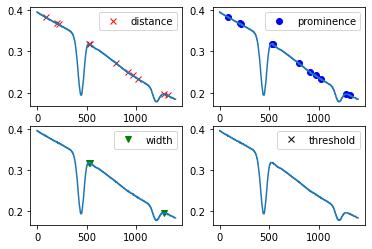

In [43]:
x = np.array(convertycut)
peaks, _ = find_peaks(x, distance=1)         # distance doesnt relly make any difference
peaks2, _ = find_peaks(x, prominence=0)      # worst!!!
peaks3, _ = find_peaks(x, width=2)           # always shows in strange position, good for nothing
peaks4, _ = find_peaks(x, threshold=0.2)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()

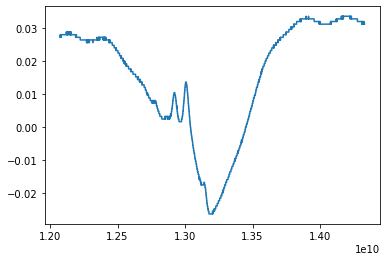

In [44]:
df01_convert = []
for i in range(len(df01[3])):
    df01_convert.append(const * df01[3][i])

plt.plot(df01_convert, df01[4])

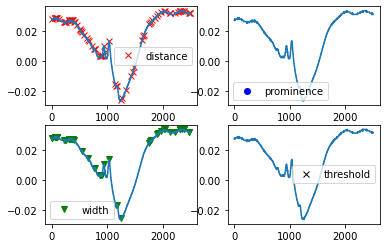

In [45]:
x = np.array(df01[4])
peaks, _ = find_peaks(x, distance=5)         # distance doesnt really make any difference
peaks2, _ = find_peaks(x, prominence=0.1)      # all or none, worst!!!
peaks3, _ = find_peaks(x, width=2)           # always shows in strange position, good for nothing
peaks4, _ = find_peaks(x, threshold=0.2)     # Required vertical distance to its direct neighbouring samples, pretty useless
plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])
plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])
plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])
plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])
plt.show()

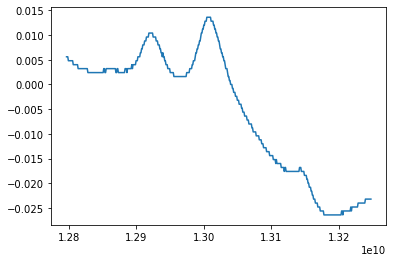

In [72]:
df01xcut = []
df01ycut = []
df01_convert
df011 = df01[4]

for x in range(800,1300):
    df01ycut.append(df011[x])
    df01xcut.append(df01_convert[x])

plt.plot(df01xcut, df01ycut)

In [47]:
x = np.array(df01ycut)
peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]
prominences

array([0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.008 , 0.0008, 0.012 ,
       0.0008, 0.0008, 0.0008, 0.0008, 0.0008])

[ 61  72  83  97 138 158 233 344 358 383 466]
12921380326.928835
13007113748.570002
13142482309.056057


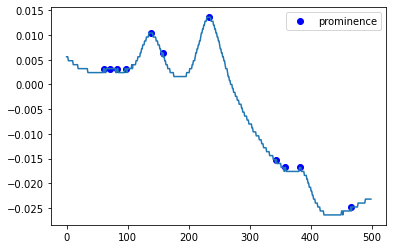

In [80]:
x = np.array(df01ycut)
peakspro, _ = find_peaks(x, prominence=0.0008) 
plt.plot(peakspro, x[peakspro], "ob"); plt.plot(x); plt.legend(['prominence'])
print(peakspro)
2500
loc_peak1 = 800 + int(peakspro[4])
loc_peak2 = 800 + int(peakspro[6])
loc_peak3 = 800 + int(peakspro[9])

print(df01_convert[int(loc_peak1)])
print(df01_convert[int(loc_peak2)])
print(df01_convert[int(loc_peak3)])